In [1]:
import tensorflow as tf

In [2]:
sess = tf.Session()
hello = tf.constant("Hello World")
print sess.run(hello)

Hello World


In [3]:
a = tf.constant(20)
b = tf.constant(30)

In [4]:
print sess.run(a + b)

50


### House Price Prediction

This is a very simple prediction of house prices based on house size, implemented 
in TensorFlow.

In [6]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support

generation some house sizes between 1000 and 3500 (typical sq ft of house)

In [7]:
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house )

In [8]:
house_size

array([1860, 2294, 2130, 2095, 2638, 3169, 1466, 2238, 1330, 2482, 3135,
       1130, 2685, 1769, 3391, 2515, 3433, 2215, 1955, 3324, 2184, 1459,
       1021, 3300, 1747, 1474, 2082, 3047, 1975, 2806, 1189, 1562, 2899,
       2267, 2528, 1646, 3068, 3214, 2297, 3435, 1600, 3363, 3061, 1241,
       3041, 2363, 3139, 2390, 2478, 1775, 1034, 3253, 2955, 2585, 2021,
       2129, 2500, 1702, 3449, 2579, 1161, 1201, 2981, 1995, 3317, 1815,
       1455, 2275, 2016, 3343, 1337, 1878, 2076, 1791, 3264, 1763, 3235,
       1379, 1492, 2180, 3062, 1064, 2367, 2152, 3027, 2495, 2162, 2522,
       1391, 2698, 1418, 3336, 1378, 2796, 3278, 3088, 3182, 1200, 2863,
       1779, 1502, 3454, 2751, 1804, 3146, 2895, 2570, 1960, 2485, 2028,
       1502, 1397, 1870, 1392, 1206, 2038, 2881, 2484, 1863, 1563, 2020,
       1095, 2923, 2757, 3278, 2678, 1540, 2059, 2183, 2722, 2819, 2597,
       1795, 2051, 2643, 2363, 2981, 2354, 2663, 2529, 3038, 2496, 3237,
       2408, 2400, 2306, 1972, 2768, 2282, 1709, 24

Generate house prices from house size with a random noise added.

In [9]:
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)

In [10]:
house_price

array([221795., 250260., 271158., 274232., 295084., 343165., 183450.,
       280994., 174962., 315391., 377631., 149023., 329590., 198585.,
       359869., 273933., 368611., 279319., 254688., 369968., 258169.,
       194593., 128496., 377480., 236134., 193058., 247142., 343131.,
       220247., 300789., 158018., 211973., 311799., 247967., 304351.,
       195994., 330356., 345290., 291306., 394240., 194502., 378077.,
       336727., 152892., 367423., 299321., 342333., 302001., 278816.,
       221397., 126012., 368783., 364055., 295659., 267074., 273894.,
       284541., 226120., 391431., 279485., 140043., 164039., 337557.,
       220521., 363353., 245073., 178917., 288257., 231292., 400058.,
       160573., 213475., 227761., 236165., 372957., 230063., 376106.,
       169434., 198327., 278397., 352051., 127416., 280953., 259476.,
       345947., 293800., 244729., 289462., 168368., 311071., 173985.,
       374843., 196899., 308171., 387776., 366844., 387416., 188984.,
       347074., 2004

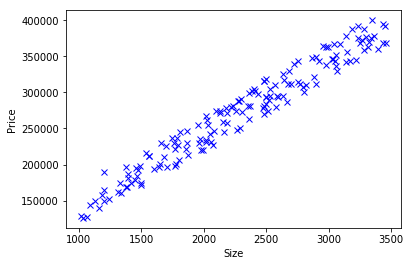

In [11]:
plt.plot(house_size, house_price, "bx")  # bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [13]:
# you need to normalize values to prevent under/overflows.
def normalize(array):
    return (array - array.mean()) / array.std()

In [16]:
# define number of training samples, 0.7 = 70%.  We can take the first 70% since the values are randomized
num_train_samples = int(math.floor(num_house * 0.7))

In [17]:
# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

In [18]:
# define test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

In [23]:
train_house_size

array([1860, 2294, 2130, 2095, 2638, 3169, 1466, 2238, 1330, 2482, 3135,
       1130, 2685, 1769, 3391, 2515, 3433, 2215, 1955, 3324, 2184, 1459,
       1021, 3300, 1747, 1474, 2082, 3047, 1975, 2806, 1189, 1562, 2899,
       2267, 2528, 1646, 3068, 3214, 2297, 3435, 1600, 3363, 3061, 1241,
       3041, 2363, 3139, 2390, 2478, 1775, 1034, 3253, 2955, 2585, 2021,
       2129, 2500, 1702, 3449, 2579, 1161, 1201, 2981, 1995, 3317, 1815,
       1455, 2275, 2016, 3343, 1337, 1878, 2076, 1791, 3264, 1763, 3235,
       1379, 1492, 2180, 3062, 1064, 2367, 2152, 3027, 2495, 2162, 2522,
       1391, 2698, 1418, 3336, 1378, 2796, 3278, 3088, 3182, 1200, 2863,
       1779, 1502, 3454, 2751, 1804, 3146, 2895, 2570, 1960, 2485, 2028,
       1502, 1397])

In [20]:
train_price

array([221795., 250260., 271158., 274232., 295084., 343165., 183450.,
       280994., 174962., 315391., 377631., 149023., 329590., 198585.,
       359869., 273933., 368611., 279319., 254688., 369968., 258169.,
       194593., 128496., 377480., 236134., 193058., 247142., 343131.,
       220247., 300789., 158018., 211973., 311799., 247967., 304351.,
       195994., 330356., 345290., 291306., 394240., 194502., 378077.,
       336727., 152892., 367423., 299321., 342333., 302001., 278816.,
       221397., 126012., 368783., 364055., 295659., 267074., 273894.,
       284541., 226120., 391431., 279485., 140043., 164039., 337557.,
       220521., 363353., 245073., 178917., 288257., 231292., 400058.,
       160573., 213475., 227761., 236165., 372957., 230063., 376106.,
       169434., 198327., 278397., 352051., 127416., 280953., 259476.,
       345947., 293800., 244729., 289462., 168368., 311071., 173985.,
       374843., 196899., 308171., 387776., 366844., 387416., 188984.,
       347074., 2004

In [28]:
#  Set up the TensorFlow placeholders that get updated as we descend down the gradient
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

In [29]:
# Define the variables holding the size_factor and price we set during training.  
# We initialize them to some random values based on the normal distribution.
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

In [30]:
# 2. Define the operations for the predicting values - predicted price = (size_factor * house_size ) + price_offset
#  Notice, the use of the tensorflow add and multiply functions.  These add the operations to the computation graph,
#  AND the tensorflow methods understand how to deal with Tensors.  Therefore do not try to use numpy or other library 
#  methods.
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

In [31]:
# 3. Define the Loss Function (how much error) - Mean squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)

In [32]:
# Optimizer learning rate.  The size of the steps down the gradient
learning_rate = 0.1

# 4. define a Gradient descent optimizer that will minimize the loss defined in the operation "cost".
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [33]:
# Initializing the variables
init = tf.global_variables_initializer()

('iteration #:', '0002', 'cost=', '0.720058858', 'size_factor=', 0.091779955, 'price_offset=', -0.78197587)
('iteration #:', '0004', 'cost=', '0.488989949', 'size_factor=', 0.2530591, 'price_offset=', -0.6400547)
('iteration #:', '0006', 'cost=', '0.334198892', 'size_factor=', 0.38506955, 'price_offset=', -0.52387947)
('iteration #:', '0008', 'cost=', '0.230510548', 'size_factor=', 0.4931228, 'price_offset=', -0.42877954)
('iteration #:', '0010', 'cost=', '0.161057353', 'size_factor=', 0.5815667, 'price_offset=', -0.350931)
('iteration #:', '0012', 'cost=', '0.114538938', 'size_factor=', 0.65396035, 'price_offset=', -0.2872049)
('iteration #:', '0014', 'cost=', '0.083384469', 'size_factor=', 0.713216, 'price_offset=', -0.23503916)
('iteration #:', '0016', 'cost=', '0.062521778', 'size_factor=', 0.76171756, 'price_offset=', -0.19233663)
('iteration #:', '0018', 'cost=', '0.048552588', 'size_factor=', 0.8014175, 'price_offset=', -0.1573807)
('iteration #:', '0020', 'cost=', '0.039200630'

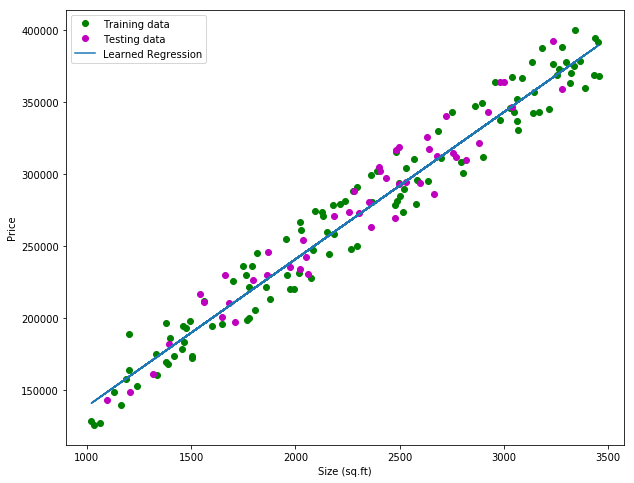

In [38]:
# Launch the graph in the session
with tf.Session() as sess:
    sess.run(init)

    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50

   # keep iterating the training data
    for iteration in range(num_training_iter):

        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')


   # Plot of training and test data, and learned regression
    
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')
 
    plt.legend(loc='upper left')
    plt.show()
